In [1]:
zip([1,2,3],[4,5,6])

[(1, 4), (2, 5), (3, 6)]

In [1]:
import pandas as pd
data = pd.read_csv('Player.csv',',')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [3]:
from sklearn import svm
labels = []
for i in range(10):
    svm_ = svm.OneClassSVM(gamma=1./(i+1), nu=0.001) 
    svm_.fit(data[['height','weight']])
    labels.append(svm_.predict(data[['height','weight']]))

In [4]:
for i in labels:
    print (i==1).mean()

0.772332730561
0.316184448463
0.495569620253
0.452169981917
0.457866184448
0.506419529837
0.462296564195
0.512296564195
0.527215189873
0.470524412297


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
svm_.predict([[250, 250]])

array([-1.])

In [7]:
svm_.decision_function([[250, 250]])

array([[-0.11101799]])

In [8]:
svm_.decision_function([10, 100])

C:\Users\Aleh_Darashenka\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-0.11101799]])

In [9]:
data['height_corr'] = 

SyntaxError: invalid syntax (<ipython-input-9-47fcea4704a3>, line 1)

In [10]:
np.c_[xx1.ravel(), yy1.ravel()]

NameError: name 'np' is not defined

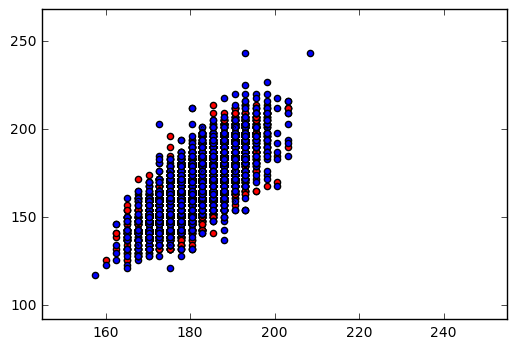

In [15]:
svm_ = svm.OneClassSVM(gamma=10, nu=0.001,kernel='rbf') 
svm_ = svm_.fit(data[['height','weight']])
                                                                       
       
labels = svm_.predict(np.asarray(data[['height', 'weight']]))
for label, color in zip((-1,1), ('red', 'blue')):
    plt.scatter(np.asarray(data[['height','weight']].values[(labels==label),0]), np.asarray(data[['height','weight']].values[(labels==label),1]),c = color)
xx1, yy1 = np.meshgrid(np.linspace(150, 250, 500), np.linspace(100, 260, 500))                                                                         
plt.figure(1)
Z1 = svm_.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour( xx1, yy1, Z1, levels=[0], linewidths=2, colors='black')                        

In [33]:
player_rate = pd.read_csv('Player_Rate.csv', ',')

player_rate.columns = ['id','height','weight', 'overall_rating']
player_rate.head()

,id,height,weight,overall_rating
0,2625,175.26,154,60.142857
1,2752,187.96,174,69.380952
2,2768,180.34,154,69.285714
3,2770,180.34,161,71.133333
4,2790,175.26,163,70.200000


In [34]:
player_rate.dropna(inplace=True)

In [39]:
import tabpy_client

client = tabpy_client.Client('http://localhost:9004/')

import numpy as np
from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=0.001 )
model.fit(player_rate[['height','overall_rating']])
labels = model.predict(np.asarray(player_rate[['height', 'overall_rating']]))
for label, color in zip((-1,1), ('red', 'blue')):
    plt.scatter(player_rate[['height','overall_rating']].values[(labels==label),0], player_rate[['height','overall_rating']].values[(labels==label),1],c = color)

def height_rank_anomalies(height, rank):
    return model.predict((zip(height,rank)).tolist())

client.deploy('height_rank_anomalies',
              height_rank_anomalies,
              'Returns labels either -1 if outlier or 1 if not')
    
    
    
xx1, yy1 = np.meshgrid(np.linspace(150, 220, 500), np.linspace(30, 100, 500))                                                                         
plt.figure(1)
Z1 = model.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour( xx1, yy1, Z1, levels=[0], linewidths=2, colors='black')       

ImportError: No module named tabpy_client

In [36]:
player_rate['weight(kg)'] = player_rate['weight']*0.453592
player_rate.head()

,id,height,weight,overall_rating,weight(kg)
0,2625,175.26,154,60.142857,69.853168
1,2752,187.96,174,69.380952,78.925008
2,2768,180.34,154,69.285714,69.853168
3,2770,180.34,161,71.133333,73.028312
4,2790,175.26,163,70.200000,73.935496


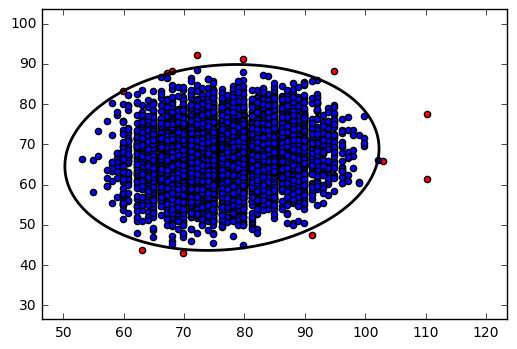

In [38]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=0.001 )
model.fit(player_rate[['weight(kg)','overall_rating']])
labels = model.predict(np.asarray(player_rate[['weight(kg)', 'overall_rating']]))
for label, color in zip((-1,1), ('red', 'blue')):
    plt.scatter(player_rate[['weight(kg)','overall_rating']].values[(labels==label),0], player_rate[['weight(kg)','overall_rating']].values[(labels==label),1],c = color)

xx1, yy1 = np.meshgrid(np.linspace(50, 120, 500), np.linspace(30, 100, 500))                                                                         
plt.figure(1)
Z1 = model.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour( xx1, yy1, Z1, levels=[0], linewidths=2, colors='black')    

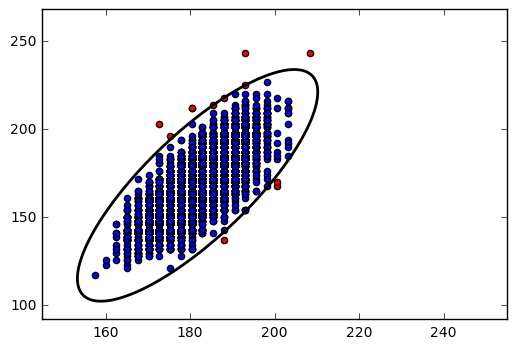

In [14]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=0.001 )
model.fit(data[['height','weight']])
labels = model.predict(np.asarray(data[['height', 'weight']]))
for label, color in zip((-1,1), ('red', 'blue')):
    plt.scatter(data[['height','weight']].values[(labels==label),0], data[['height','weight']].values[(labels==label),1],c = color)

xx1, yy1 = np.meshgrid(np.linspace(150, 250, 500), np.linspace(100, 260, 500))                                                                         
plt.figure(1)
Z1 = model.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour( xx1, yy1, Z1, levels=[0], linewidths=2, colors='black')            

In [141]:
model.decision_function([[170.18,163]])

array([ 0.85381473])

In [143]:
np.asarray(data[['height', 'weight']])

array([[ 182.88,  187.  ],
       [ 170.18,  146.  ],
       [ 170.18,  163.  ],
       ..., 
       [ 180.34,  154.  ],
       [ 185.42,  172.  ],
       [ 180.34,  176.  ]])

In [139]:
data['predict'] = model.predict(data[['height', 'weight']])

In [64]:
from sklearn.ensemble import IsolationForest
model2 = IsolationForest(max_samples=11060,
                                        contamination=0.1,
                                        random_state=1)
model2 = EllipticEnvelope(contamination=0.25)
model2.fit(data[['height','weight']])
labels = model2.predict(data[['height','weight']])
for label, color in zip((-1,1), ('red', 'blue')):
    plt.scatter(data[['height','weight']].values[(labels==label),0], data[['height','weight']].values[(labels==label),1],\
                                                                         c = color)
            

ImportError: cannot import name IsolationForest

In [66]:
(labels==1).mean()

0.00018083182640144665

In [77]:
data[['height','weight']].values[(labels==1),1]

array([ 187.,  146.])